---

# Combined features Based Classification

---


In [49]:
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt

## Load dataset

In [2]:
Xa = np.load('../dataset/counts.npy')
Xb = np.load('../dataset/slopes.npy')
Xc = np.load('../dataset/stds.npy')
y = np.load('../dataset/labels.npy')
classes = np.load('../dataset/mappings.npy')

In [4]:
print(f'Xa shape: {Xa.shape}')
print(f'Xb shape: {Xb.shape}')
print(f'Xc shape: {Xc.shape}')
print(f'y shape: {y.shape}')

Xa shape: (36262, 73)
Xb shape: (36262, 73)
Xc shape: (36262, 73)
y shape: (36262, 40)


## Train-test split

In [5]:
Xa_train, Xa_temp, Xb_train, Xb_temp, Xc_train, Xc_temp, y_train, y_temp = train_test_split(Xa, Xb, Xc, y, test_size=0.3, random_state=42)
Xa_val, Xa_test, Xb_val, Xb_test, Xc_val, Xc_test, y_val, y_test = train_test_split(Xa_temp, Xb_temp, Xc_temp, y_temp, test_size=0.5, random_state=42)

## Model

In [41]:
a_input = keras.layers.Input(shape=(Xa.shape[1],))
b_input = keras.layers.Input(shape=(Xb.shape[1],))
c_input = keras.layers.Input(shape=(Xc.shape[1],))

In [42]:
a = keras.layers.Dense(512, activation='relu')(a_input)
a = keras.layers.Dense(512, activation='relu')(a)
a = keras.layers.Dropout(0.2)(a)
a = keras.layers.Dense(256, activation='relu')(a)
a = keras.layers.Dense(256, activation='relu')(a)
a = keras.layers.Dropout(0.2)(a)
a = keras.layers.Dense(128, activation='relu')(a)
a = keras.layers.Dense(64, activation='relu')(a)

In [43]:
b = keras.layers.Dense(512, activation='relu')(b_input)
b = keras.layers.Dense(512, activation='relu')(b)
b = keras.layers.Dropout(0.2)(b)
b = keras.layers.Dense(256, activation='relu')(b)
b = keras.layers.Dense(256, activation='relu')(b)
b = keras.layers.Dropout(0.2)(b)
b = keras.layers.Dense(128, activation='relu')(b)
b = keras.layers.Dense(64, activation='relu')(b)

In [44]:
c = keras.layers.Dense(512, activation='relu')(c_input)
c = keras.layers.Dense(512, activation='relu')(c)
c = keras.layers.Dropout(0.2)(c)
c = keras.layers.Dense(256, activation='relu')(c)
c = keras.layers.Dense(256, activation='relu')(c)
c = keras.layers.Dropout(0.2)(c)
c = keras.layers.Dense(128, activation='relu')(c)
c = keras.layers.Dense(64, activation='relu')(c)

In [45]:
x = keras.layers.concatenate([a, b, c])
x = keras.layers.Dense(128, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(x)

In [46]:
output = keras.layers.Dense(y.shape[1], activation='softmax')(x)

model = keras.models.Model(inputs=[a_input, b_input, c_input], outputs=output)

In [47]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 73)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_16      │ (None, 73)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_17      │ (None, 73)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_111 (Dense)   │ (None, 512)       │     37,888 │ input_layer_15[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_117 (Dense)   │ (None, 512)       │     37,888 │ input_layer_16[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_123 (Dense)   │ (None, 512)       │     37,888 │ input_layer_17[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_112 (Dense)   │ (None, 512)       │    262,656 │ dense_111[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_118 (Dense)   │ (None, 512)       │    262,656 │ dense_117[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_124 (Dense)   │ (None, 512)       │    262,656 │ dense_123[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_34          │ (None, 512)       │          0 │ dense_112[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_36          │ (None, 512)       │          0 │ dense_118[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_38          │ (None, 512)       │          0 │ dense_124[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_113 (Dense)   │ (None, 256)       │    131,328 │ dropout_34[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_119 (Dense)   │ (None, 256)       │    131,328 │ dropout_36[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_125 (Dense)   │ (None, 256)       │    131,328 │ dropout_38[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_114 (Dense)   │ (None, 256)       │     65,792 │ dense_113[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_120 (Dense)   │ (None, 256)       │     65,792 │ dense_119[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_126 (Dense)   │ (None, 256)       │     65,792 │ dense_125[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_35          │ (None, 256)       │          0 │ dense_114[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_37          │ (None, 256)       │          0 │ dense_120[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_39          │ (None, 256)       │          0 │ dense_126[0][0] 

 Total params: 1,652,008 (6.30 MB)

 Trainable params: 1,652,008 (6.30 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [48]:
model.fit([Xa_train, Xb_train, Xc_train], y_train, validation_data=([Xa_val, Xb_val, Xc_val], y_val), epochs=50)

Epoch 1/50


/home/vivek/anaconda3/envs/amplab/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_166', 'keras_tensor_167', 'keras_tensor_168']. Received: the structure of inputs=('*', '*', '*')
  warnings.warn(


794/794 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1505 - loss: 3.0749 - val_accuracy: 0.3749 - val_loss: 2.0238
Epoch 2/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4065 - loss: 1.8996 - val_accuracy: 0.4492 - val_loss: 1.7292
Epoch 3/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4795 - loss: 1.6344 - val_accuracy: 0.4876 - val_loss: 1.6204
Epoch 4/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5312 - loss: 1.4555 - val_accuracy: 0.5486 - val_loss: 1.4492
Epoch 5/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5775 - loss: 1.3125 - val_accuracy: 0.5755 - val_loss: 1.3557
Epoch 6/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6087 - loss: 1.2113 - val_accuracy: 0.5825 - val_loss: 1.3445
Epoch 7/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6368 - loss: 1.1303 - val_accuracy: 0.5900 - val_loss: 1.3389
Epoch 8/50
794/794 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6675 - loss: 1.0442 - val_accuracy: 0.6246 - val

## Test

In [51]:
loss, accuracy = model.evaluate([Xa_test, Xb_test, Xc_test], y_test)

170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6789 - loss: 1.7233


In [52]:
print(f'Test accuracy: {round(accuracy * 100, 2)}')

Test accuracy: 68.18


In [54]:
y_pred = model.predict([Xa_test, Xb_test, Xc_test])

170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [55]:
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1), average='macro')
print(f'f1 score: {f1}')

f1 score: 0.6656581021608019


In [56]:
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

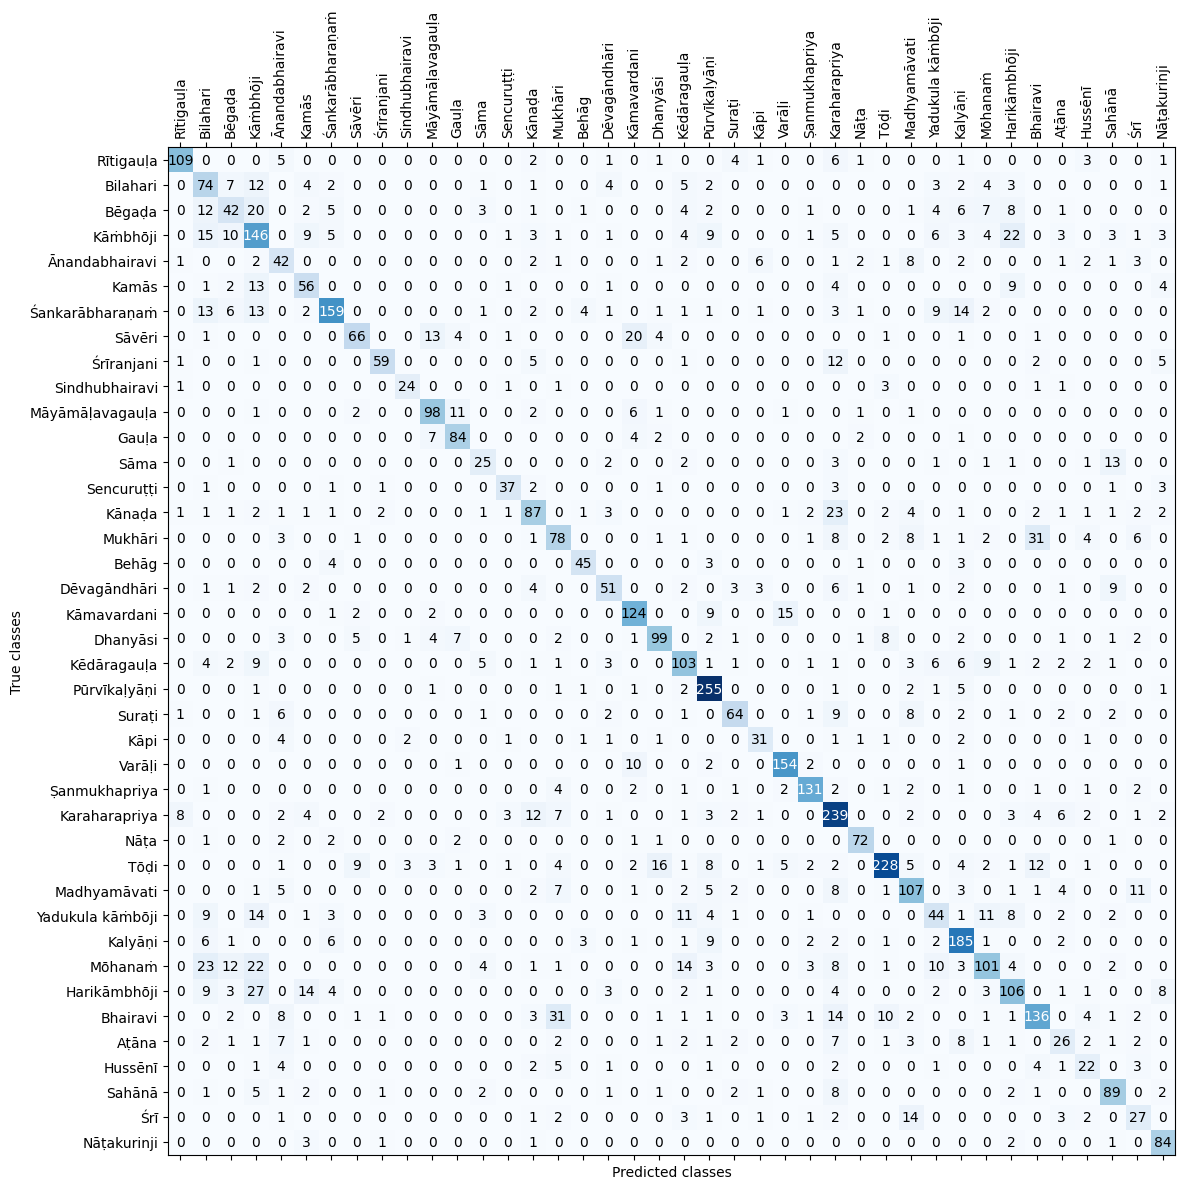

In [58]:
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.matshow(cm, cmap=plt.cm.Blues)

ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes, rotation=90)
ax.set_yticklabels(classes)

ax.set_xlabel('Predicted classes')
ax.set_ylabel('True classes')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'black' if cm[i, j] < max(cm.flatten()) / 2 else 'white'
        ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

plt.savefig('../plots/confusion_matrix_combined.png', dpi=300)
plt.tight_layout()
plt.show()